In [1]:
import pandas as pd
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV, RFE
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [2]:
df = pd.read_csv('ICO_cleaned_v4.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1577 entries, 0 to 1576
Columns: 240 entries, success to accepting_ETC
dtypes: float64(10), int64(230)
memory usage: 2.9 MB


In [3]:
print(f"{df[df['success'] == 1].shape[0] / df.shape[0]:.1%}")

55.2%


In [4]:
def plot_confusion_matrix(cm, classes, normalise=False):
    if normalise:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap='Blues')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalise else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [5]:
acc_scores = np.array([])
precision_scores = np.array([])
recall_scores = np.array([])
f1_scores = np.array([])

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
for i_train, i_test in cv.split(df.iloc[:,1:], df.iloc[:,0]):
    x_train = df.iloc[i_train,1:]
    x_test = df.iloc[i_test,1:]
    y_train = df.iloc[i_train,0]
    y_test = df.iloc[i_test,0]

    lrm = LogisticRegression()
    lrm.fit(x_train, y_train)
    preds = lrm.predict(x_test)

    acc_scores = np.append(acc_scores, accuracy_score(y_test, preds))
    precision_scores = np.append(precision_scores, precision_score(y_test, preds))
    recall_scores = np.append(recall_scores, recall_score(y_test, preds))
    f1_scores = np.append(f1_scores, f1_score(y_test, preds))

print(f"{np.mean(acc_scores):.2%}")
print(f"{np.mean(precision_scores):.2%}")
print(f"{np.mean(recall_scores):.2%}")
print(f"{np.mean(f1_scores):.2%}")

72.17%
74.77%
74.94%
74.83%


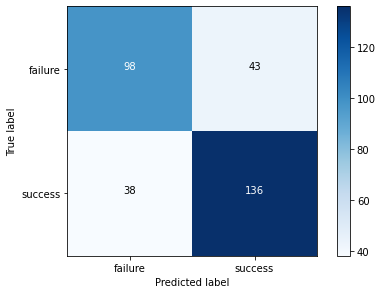

In [6]:
plot_confusion_matrix(confusion_matrix(y_test, preds), ['failure', 'success'])
plt.savefig('cm_lrm.png', dpi=300, bbox_inches = 'tight', pad_inches=0)

In [7]:
acc_scores = np.array([])
precision_scores = np.array([])
recall_scores = np.array([])
f1_scores = np.array([])

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
for i_train, i_test in cv.split(df.iloc[:,1:], df.iloc[:,0]):
    x_train = df.iloc[i_train,1:]
    x_test = df.iloc[i_test,1:]
    y_train = df.iloc[i_train,0]
    y_test = df.iloc[i_test,0]

    dtm = DecisionTreeClassifier()
    dtm.fit(x_train, y_train)
    preds = dtm.predict(x_test)

    acc_scores = np.append(acc_scores, accuracy_score(y_test, preds))
    precision_scores = np.append(precision_scores, precision_score(y_test, preds))
    recall_scores = np.append(recall_scores, recall_score(y_test, preds))
    f1_scores = np.append(f1_scores, f1_score(y_test, preds))

print(f"{np.mean(acc_scores):.2%}")
print(f"{np.mean(precision_scores):.2%}")
print(f"{np.mean(recall_scores):.2%}")
print(f"{np.mean(f1_scores):.2%}")

64.49%
68.32%
67.01%
67.55%


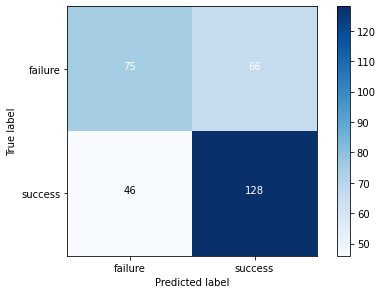

In [8]:
plot_confusion_matrix(confusion_matrix(y_test, preds), ['failure', 'success'])
plt.savefig('cm_dtm.png', dpi=300, bbox_inches = 'tight', pad_inches=0)

In [9]:
acc_scores = np.array([])
precision_scores = np.array([])
recall_scores = np.array([])
f1_scores = np.array([])

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
for i_train, i_test in cv.split(df.iloc[:,1:], df.iloc[:,0]):
    x_train = df.iloc[i_train,1:]
    x_test = df.iloc[i_test,1:]
    y_train = df.iloc[i_train,0]
    y_test = df.iloc[i_test,0]

    rfm = RandomForestClassifier(random_state=42)
    rfm.fit(x_train, y_train)
    preds = rfm.predict(x_test)

    acc_scores = np.append(acc_scores, accuracy_score(y_test, preds))
    precision_scores = np.append(precision_scores, precision_score(y_test, preds))
    recall_scores = np.append(recall_scores, recall_score(y_test, preds))
    f1_scores = np.append(f1_scores, f1_score(y_test, preds))

print(f"{np.mean(acc_scores):.2%}")
print(f"{np.mean(precision_scores):.2%}")
print(f"{np.mean(recall_scores):.2%}")
print(f"{np.mean(f1_scores):.2%}")

73.62%
75.61%
77.13%
76.35%


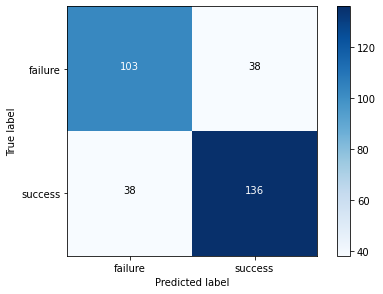

In [10]:
plot_confusion_matrix(confusion_matrix(y_test, preds), ['failure', 'success'])
plt.savefig('cm_rfm.png', dpi=300, bbox_inches = 'tight', pad_inches=0)

In [11]:
acc_scores = np.array([])
precision_scores = np.array([])
recall_scores = np.array([])
f1_scores = np.array([])

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
for i_train, i_test in cv.split(df.iloc[:,1:], df.iloc[:,0]):
    x_train = df.iloc[i_train,1:]
    x_test = df.iloc[i_test,1:]
    y_train = df.iloc[i_train,0]
    y_test = df.iloc[i_test,0]

    svm = SVC(random_state=42)
    svm.fit(x_train, y_train)
    preds = svm.predict(x_test)

    acc_scores = np.append(acc_scores, accuracy_score(y_test, preds))
    precision_scores = np.append(precision_scores, precision_score(y_test, preds))
    recall_scores = np.append(recall_scores, recall_score(y_test, preds))
    f1_scores = np.append(f1_scores, f1_score(y_test, preds))

print(f"{np.mean(acc_scores):.2%}")
print(f"{np.mean(precision_scores):.2%}")
print(f"{np.mean(recall_scores):.2%}")
print(f"{np.mean(f1_scores):.2%}")

71.47%
74.40%
73.79%
74.07%


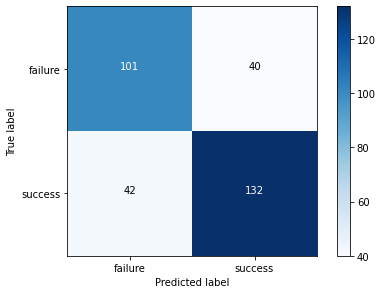

In [12]:
plot_confusion_matrix(confusion_matrix(y_test, preds), ['failure', 'success'])
plt.savefig('cm_svm.png', dpi=300, bbox_inches = 'tight', pad_inches=0)

In [13]:
# x_train, x_test, y_train, y_test = train_test_split(
#     df.loc[:, df.columns!='success'], df['success'],
#     stratify=df['success'], train_size=0.8, random_state=42
# )
#
# print(x_train.shape, x_test.shape)

In [14]:
# rfecv_scores = []
# for i in range(df.columns.shape[0] - 1):
#     lrm = LogisticRegression()
#     rfecv = RFECV(estimator=lrm,
#                   cv=StratifiedKFold(5, shuffle=True, random_state=42),
#                   scoring='accuracy',
#                   min_features_to_select=i+1)
#     fit = rfecv.fit(df.iloc[:,1:], df.iloc[:,0])
#     rfecv_scores.append(fit.grid_scores_.max())
#     print(i+1, f"{rfecv_scores[-1]:.2%}")
    # if fit.grid_scores_.max() > max_accuracy:
    #     max_accuracy = fit.grid_scores_.max()
    #     print(i+1, f"{max_accuracy:.2%}")

In [15]:
lrm = LogisticRegression()
rfecv = RFECV(estimator=lrm,
              cv=StratifiedKFold(5, shuffle=True, random_state=42),
              scoring='accuracy',
              min_features_to_select=6)
fit = rfecv.fit(df.iloc[:,1:], df.iloc[:,0])
print(f"{fit.grid_scores_.max():.2%}")

74.07%


In [16]:
selected_features = np.array(df.iloc[:,1:].columns)[fit.support_]
selected_features

array(['overallrating', 'socialMedia', 'country_CHINA', 'country_BELARUS',
       'platform_OMNI', 'platform_BITSHARES'], dtype=object)

In [17]:
acc_scores = np.array([])
precision_scores = np.array([])
recall_scores = np.array([])
f1_scores = np.array([])

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
for i_train, i_test in cv.split(df.iloc[:,1:], df.iloc[:,0]):
    x_train = df.loc[i_train,selected_features]
    x_test = df.loc[i_test,selected_features]
    y_train = df.iloc[i_train,0]
    y_test = df.iloc[i_test,0]

    lrm = LogisticRegression()
    lrm.fit(x_train, y_train)
    preds = lrm.predict(x_test)

    acc_scores = np.append(acc_scores, accuracy_score(y_test, preds))
    precision_scores = np.append(precision_scores, precision_score(y_test, preds))
    recall_scores = np.append(recall_scores, recall_score(y_test, preds))
    f1_scores = np.append(f1_scores, f1_score(y_test, preds))

print(f"{np.mean(acc_scores):.2%}")
print(f"{np.mean(precision_scores):.2%}")
print(f"{np.mean(recall_scores):.2%}")
print(f"{np.mean(f1_scores):.2%}")

74.38%
77.34%
75.86%
76.57%


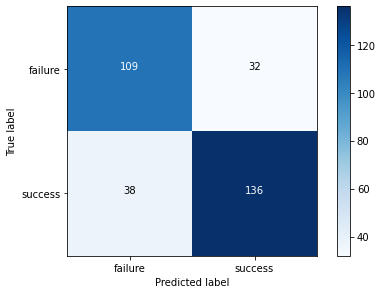

In [18]:
plot_confusion_matrix(confusion_matrix(y_test, preds), ['failure', 'success'])
plt.savefig('cm_lrm_fs.png', dpi=300, bbox_inches = 'tight', pad_inches=0)